In [ ]:
#shiraz yeshayahu
#shoval sroia

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# Data preprocessing:

In [2]:
#Data ingestion
df_train = pd.read_csv(r"C:\Users\WIN10\OneDrive\שולחן העבודה\WIN10\שנה ד\סמסטר ב\נושאים מתקדמים בלמידת מכונה\פרויקט קורס\train.csv")  # replace with your own data file
df_test = pd.read_csv(r"C:\Users\WIN10\OneDrive\שולחן העבודה\WIN10\שנה ד\סמסטר ב\נושאים מתקדמים בלמידת מכונה\פרויקט קורס\test.csv")  # replace with your own data file
df_transactions = pd.read_csv(r"C:\Users\WIN10\OneDrive\שולחן העבודה\WIN10\שנה ד\סמסטר ב\נושאים מתקדמים בלמידת מכונה\פרויקט קורס\transactions.csv")  # replace with your own data file
df_stores = pd.read_csv(r"C:\Users\WIN10\OneDrive\שולחן העבודה\WIN10\שנה ד\סמסטר ב\נושאים מתקדמים בלמידת מכונה\פרויקט קורס\stores.csv")  # replace with your own data file
df_sample_submission = pd.read_csv(r"C:\Users\WIN10\OneDrive\שולחן העבודה\WIN10\שנה ד\סמסטר ב\נושאים מתקדמים בלמידת מכונה\פרויקט קורס\sample_submission.csv")  # replace with your own data file
df_oil = pd.read_csv(r"C:\Users\WIN10\OneDrive\שולחן העבודה\WIN10\שנה ד\סמסטר ב\נושאים מתקדמים בלמידת מכונה\פרויקט קורס\oil.csv")  # replace with your own data file
df_holidays_events = pd.read_csv(r"C:\Users\WIN10\OneDrive\שולחן העבודה\WIN10\שנה ד\סמסטר ב\נושאים מתקדמים בלמידת מכונה\פרויקט קורס\holidays_events.csv")  # replace with your own data file


In [3]:
def df_analysis(data, data_name):
  
    print("missing values in ",data_name, ":" )
    print(data.isnull().sum()) #checking number of missing values

    print("type values in ",data_name, ":")
    print(data.dtypes) #checking type of values
    
    print("duplicate values in ",data_name, ":")
    print(data.duplicated().sum()) #checking duplicate values
    
    print("statistical values ",data_name, ":")
    print(data.describe()) # Checking statistical values

In [4]:
df_analysis(df_train, "df_train")
df_analysis(df_test, "df_test")
df_analysis(df_transactions, "df_transactions")
df_analysis(df_stores, "df_stores")
df_analysis(df_oil, "df_oil")
df_analysis(df_holidays_events, "df_holidays_events")


missing values in  df_train :
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
type values in  df_train :
id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object
duplicate values in  df_train :
0
statistical values  df_train :
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02
missing values in  df_test :
id             0
date   

In [5]:
#Connecting data to create one data 
df_merge = df_train.merge(df_holidays_events, how='left', on = 'date')
df_merge = df_merge.merge(df_transactions, how='left', on = ['date', 'store_nbr'])
df_merge = df_merge.merge(df_stores, how='left', on = 'store_nbr')
df_merge = df_merge.merge(df_oil, how='left', on = 'date')
display(df_merge)

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,transactions,city,state,type_y,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,Quito,Pichincha,B,6,47.57
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,Quito,Pichincha,B,6,47.57
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,Quito,Pichincha,B,6,47.57
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False,2155.0,Quito,Pichincha,B,6,47.57


In [6]:
df_merge.rename(columns={"type_x": "type_holiday", "type_y": "type_store"}, inplace=True) #Rename columns

In [7]:
df_merge = df_merge.dropna() #Removing empty values from the data

# EDA (Exploratory data analysis):

Statistical analysis:

<AxesSubplot:>

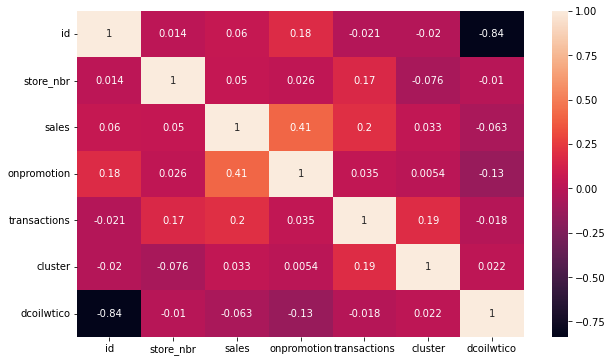

In [8]:
#Correlation test:
plt.subplots(figsize=(10, 6))
correlation_map = df_merge.corr()
sns.heatmap(correlation_map, annot=True)

In [9]:
#(-0.079) ישנו מתאם שלילי נמוך בין מחיר נפט יומי למכירות 
#ניתן לראות מתאם שלילי בין מחיר נפט למספר הכולל של פריטים במשפחת מוצרים שקודמו בחנות בתאריך נתון (0.15-)

#ישנו מתאם חיובי גבוה יחסית בין מכירות למס'כולל של פריטים במשפחת מוצרים שקודמו(0.43), ניתן להסיק שככל שיש יותר פריטים שקודמו, כך יהיו יותר מכירות  

#  (0.2)ישנו מתאם חיובי גבוה יחסית ודי דומה בין טרנזקציות ל-3 משתנים שונים שהם: מכירות(0.21),החנות שבה המוצרים נמכרים(0.19) ואשכול(שזו קבוצה של חנויות דומות


Data visualization:

Text(0.5, 1.0, 'graph 1: Relationship between Daily Oil Price and Total Sales')

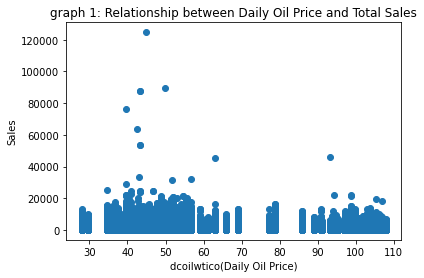

In [10]:
# גרף 1
#:תרשים פיזור כדי לדמיין את הקשר בין מחיר הנפט היומי לבין סך המכירות

# Create a scatter plot of daily oil price vs total sales
plt.scatter(df_merge['dcoilwtico'], df_merge['sales'])

# Add labels and a title
plt.xlabel('dcoilwtico(Daily Oil Price)')
plt.ylabel('Sales')
plt.title('graph 1: Relationship between Daily Oil Price and Total Sales')


In [11]:
#.ניתן לראות בגרף עליה במכירות כאשר מחיר הנפט היומי נמוך בטווח 40-50, אך עדיין אי אפשר להגיד שישנו קשר מוחלט בין המשתנים.  דבר המסביר את המתאם השלילי שלהם שמצאנו שנמוך. 

Text(0.5, 1.0, 'graph 2:Relationship between dcoilwtico and onpromotion')

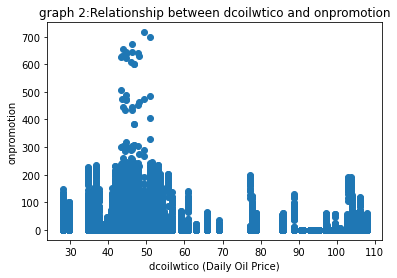

In [12]:
# גרף 2
#גרף בין פריטים במשפחת מוצרים שקודמו בחנות כאשר מחיר הנפט היומי

plt.scatter(df_merge['dcoilwtico'], df_merge['onpromotion'])

# Add labels and a title
plt.xlabel('dcoilwtico (Daily Oil Price)')
plt.ylabel('onpromotion')
plt.title('graph 2:Relationship between dcoilwtico and onpromotion')


In [13]:
# גם בגרף זה ניתן לראות ערכים גבוהים במספר הכולל של פריטים במשפחת מוצרים שקודמו בחנות כאשר מחיר הנפט היומי נמוך ובטווח 40-50, דבר המסביר את המתאם השלילי הנמוך בינהם
##ומראה שאין קשר מהותי בין מחיר נפט יומי למכירות ושניתן לוותר על תכונה זו במודל 

In [14]:
# ניתן לראות מ2 הגרפים שכאשר ערכו של מחיר הנפט היומי נע בין 40-50, ישנה עלייה דומה במכירות ובמספר הכולל של פריטים במשפחת מוצרים שקודמו בחנות בתאריך נתון. דבר המרמז שייתכן ויש גורם/ משתנה אחר שמשפיע על 2 משתנים אלו בטווח הזה, ושנראה כי ישנו קשר שכדאי לבדוק בין 2 המשתנים הללו. כמו כן ראינו חיזוק לקשר זה בבדיקת הקורלציה בה יצא מתאם חיובי גבוהה ביניהם


In [15]:
#כעת אנו רוצות לבדוק את הקשר בין מכירות למס' הכולל של פריטים במשפחת מוצרים שקודמו בחנות, מאחר ומשפחת מוצרים משתייכת לאותו סוג מוצר, נרצה להתייחס גם לתכונת סוג המוצר, ולכן נראה בגרף בצבעים שונים את החלוקה לקטגוריות השונות של סוג המוצר. מה גם שלא ראינו את המתאם של סוג המוצר למכירות בבדיקת הקורלציה ולכן נבדוק כעת את הקשר בעזרת גרף.  
# לשם כך נצטרך לבצע קידוד תכונות , כלומר הפיכת תכונות קטגוריות או לא מספריות במערך נתונים לתכונות מספריות שניתן להשתמש בהן על ידי מודלים של למידת מכונה. 

# Feature engineering:

In [16]:
#נבצע כבר קידוד לכל התכונות שאינן מספריות על מנת שנוכל לבדוק גם את הקשר שלהן למכירות
#לשם כך ניצור פונק' שתראה לנו את העמודות שמטיפוס אובייקט, שעליהן נבצע קידוד לאחר מכן

# Loop through each column in the dataframe
for column in df_merge.columns:
    
    # Check if column data type is object
    if df_merge[column].dtype == 'object':
        
        # Print the name of the column
        print(column) 

date
family
type_holiday
locale
locale_name
description
transferred
city
state
type_store


In [17]:
#Attribute encoding from object to number

from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

    
df_merge['family_encoded'] = le.fit_transform(df_merge['family']) # Encode 'family' property
df_merge['type_holiday_encoded'] = le.fit_transform(df_merge['type_holiday']) # Encode 'type_holiday' property
df_merge['locale_encoded'] = le.fit_transform(df_merge['locale']) # Encode 'locale' property
df_merge['locale_name_encoded'] = le.fit_transform(df_merge['locale_name']) # Encode 'locale_name' property
df_merge['description_encoded'] = le.fit_transform(df_merge['description']) # Encode 'transferred' property
df_merge['transferred_encoded'] = le.fit_transform(df_merge['transferred']) # Encode 'transferred' property
df_merge['city_encoded'] = le.fit_transform(df_merge['city']) # Encode 'city' property
df_merge['state_encoded'] = le.fit_transform(df_merge['state']) # Encode 'state' property
df_merge['type_store_encoded'] = le.fit_transform(df_merge['type_store']) # Encode 'type_store' property

# Print the encoded values and their corresponding original values
print(df_merge[['family', 'family_encoded']].drop_duplicates())
print(df_merge[['type_holiday', 'type_holiday_encoded']].drop_duplicates())
print(df_merge[['locale', 'locale_encoded']].drop_duplicates())
print(df_merge[['locale_name', 'locale_name_encoded']].drop_duplicates())
print(df_merge[['description', 'description_encoded']].drop_duplicates())
print(df_merge[['transferred', 'transferred_encoded']].drop_duplicates())
print(df_merge[['city', 'city_encoded']].drop_duplicates())
print(df_merge[['state', 'state_encoded']].drop_duplicates())
print(df_merge[['type_store', 'type_store_encoded']].drop_duplicates())


                           family  family_encoded
73062                  AUTOMOTIVE               0
73063                   BABY CARE               1
73064                      BEAUTY               2
73065                   BEVERAGES               3
73066                       BOOKS               4
73067                BREAD/BAKERY               5
73068                 CELEBRATION               6
73069                    CLEANING               7
73070                       DAIRY               8
73071                        DELI               9
73072                        EGGS              10
73073                FROZEN FOODS              11
73074                   GROCERY I              12
73075                  GROCERY II              13
73076                    HARDWARE              14
73077          HOME AND KITCHEN I              15
73078         HOME AND KITCHEN II              16
73079             HOME APPLIANCES              17
73080                   HOME CARE              18


In [18]:
display(df_merge)

,id,date,store_nbr,family,sales,onpromotion,type_holiday,locale,locale_name,description,...,dcoilwtico,family_encoded,type_holiday_encoded,locale_encoded,locale_name_encoded,description_encoded,transferred_encoded,city_encoded,state_encoded,type_store_encoded
73062,73062,2013-02-11,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Carnaval,...,97.01,0,3,1,4,11,0,18,12,3
73063,73063,2013-02-11,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Carnaval,...,97.01,1,3,1,4,11,0,18,12,3
73064,73064,2013-02-11,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Carnaval,...,97.01,2,3,1,4,11,0,18,12,3
73065,73065,2013-02-11,1,BEVERAGES,172.000,0,Holiday,National,Ecuador,Carnaval,...,97.01,3,3,1,4,11,0,18,12,3
73066,73066,2013-02-11,1,BOOKS,0.000,0,Holiday,National,Ecuador,Carnaval,...,97.01,4,3,1,4,11,0,18,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,...,47.57,28,3,0,19,26,0,18,12,1
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,...,47.57,29,3,0,19,26,0,18,12,1
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,...,47.57,30,3,0,19,26,0,18,12,1
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,...,47.57,31,3,0,19,26,0,18,12,1


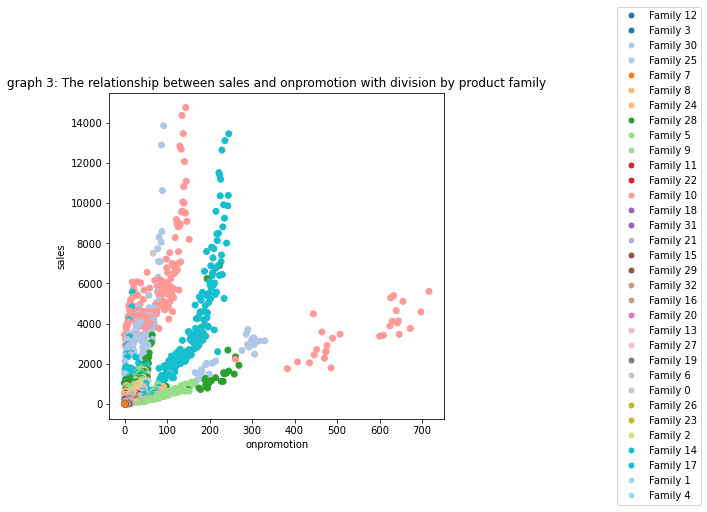

In [19]:
#גרף 3
#כעת לאחר שקידדנו את תכונת סוג מוצר והפכנו אותה למספרית, נבדוק את הקשר בין מכירות למס' הכולל של פריטים במשפחת מוצרים שקודמו בחנות, וצבע כל נקודה יראה את סוג המוצר הנמכר, כדי לנסות גם לראות האם לסוג המוצר הנמכר יש השפעה על המכירות וללמוד מכך משהו 

df_onpromotion_sales = df_merge.groupby(['onpromotion',"family_encoded"]).agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)

# Get unique families and corresponding labels
unique_families = df_onpromotion_sales["family_encoded"].unique()
labels = ['Family ' + str(value) for value in unique_families]

# Create a colormap with a unique color for each family
colors = plt.cm.get_cmap('tab20', len(unique_families))

# Set the figure size
plt.figure(figsize=(6, 6))  # width and height as desired

# Create the scatter plot with color mapping
scatter_plot = plt.scatter(df_onpromotion_sales['onpromotion'], df_onpromotion_sales['sales'],
                           c=df_onpromotion_sales["family_encoded"], cmap=colors)

# Add labels and a title
plt.xlabel('onpromotion')
plt.ylabel('sales')
plt.title('graph 3: The relationship between sales and onpromotion with division by product family')

# Create a custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=colors(i), markersize=7) for i, label in enumerate(labels)]

# Add the legend
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.5, 0.5))


In [20]:
##קודם כל בהתאמה למתאם החיובי היחסית גבוה שמצאנו (0.43), ניתן לראות שככל שמכירות עולות אז גם המספר הכולל של פריטים במשפחת מוצרים שקודמו בחנות עולה

#ניתן להבחין בחלוקה לסוג המוצר הנמכר, כמו כן נראה שיש מוצרים שנמכרים יותר ביחס לשאר  

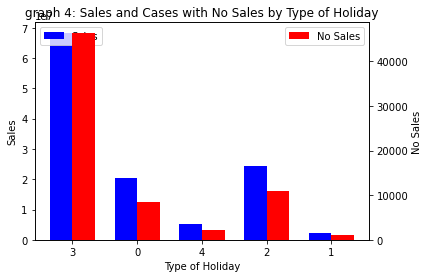

In [21]:
#נרצה לראות בגרף את הקשר בין סוג החג למכירות
#גרף 4

# Group the data by type_holiday and calculate the total sales for each type
sales_by_type_holiday = df_merge.groupby('type_holiday_encoded')['sales'].sum()

# Get all unique type_holidays
all_type_holidays = df_merge['type_holiday_encoded'].unique()

# Create a list to store the sales values for all type_holidays
sales_values = []

# Create a list to store the number of cases with no sales for all type_holidays
no_sales_count = []

# Iterate over all unique type_holidays
for type_holiday in all_type_holidays:
    # If the type_holiday has a sales value, append it to the sales_values list
    if type_holiday in sales_by_type_holiday.index:
        sales_values.append(sales_by_type_holiday[type_holiday])
    # If the type_holiday has no sales value, append 0 to sales_values
    else:
        sales_values.append(0)

    # Count the number of cases with no sales for each type_holiday
    no_sales_count.append(len(df_merge[(df_merge['type_holiday_encoded'] == type_holiday) & (df_merge['sales'] == 0)]))

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(all_type_holidays))
r2 = [x + bar_width for x in r1]

# Create the figure and axes
fig, ax1 = plt.subplots()

# Create the first y-axis for sales
ax1.bar(r1, sales_values, width=bar_width, label='Sales', color='blue')
ax1.set_xlabel('Type of Holiday')
ax1.set_ylabel('Sales')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Create a second y-axis for no sales
ax2 = ax1.twinx()
ax2.bar(r2, no_sales_count, width=bar_width, label='No Sales', color='red')
ax2.set_ylabel('No Sales')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Customize the x-axis ticks and labels
plt.xticks([r + bar_width / 2 for r in range(len(all_type_holidays))], all_type_holidays)

# Add a title
plt.title('graph 4: Sales and Cases with No Sales by Type of Holiday')

# Display the bar graph
plt.show()




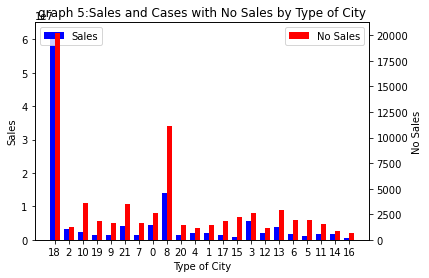

In [22]:
#נרצה לראות בגרף את הקשר בין העיר למכירות
#גרף 5

# Group the data by type_holiday and calculate the total sales for each type
sales_by_type_holiday = df_merge.groupby('city_encoded')['sales'].sum()

# Get all unique type_holidays
all_type_holidays = df_merge['city_encoded'].unique()

# Create a list to store the sales values for all type_holidays
sales_values = []

# Create a list to store the number of cases with no sales for all type_holidays
no_sales_count = []

# Iterate over all unique type_holidays
for type_holiday in all_type_holidays:
    # If the type_holiday has a sales value, append it to the sales_values list
    if type_holiday in sales_by_type_holiday.index:
        sales_values.append(sales_by_type_holiday[type_holiday])
    # If the type_holiday has no sales value, append 0 to sales_values
    else:
        sales_values.append(0)

    # Count the number of cases with no sales for each type_holiday
    no_sales_count.append(len(df_merge[(df_merge['city_encoded'] == type_holiday) & (df_merge['sales'] == 0)]))

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(all_type_holidays))
r2 = [x + bar_width for x in r1]

# Create the figure and axes
fig, ax1 = plt.subplots()

# Create the first y-axis for sales
ax1.bar(r1, sales_values, width=bar_width, label='Sales', color='blue')
ax1.set_xlabel('Type of City')
ax1.set_ylabel('Sales')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Create a second y-axis for no sales
ax2 = ax1.twinx()
ax2.bar(r2, no_sales_count, width=bar_width, label='No Sales', color='red')
ax2.set_ylabel('No Sales')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Customize the x-axis ticks and labels
plt.xticks([r + bar_width / 2 for r in range(len(all_type_holidays))], all_type_holidays)

# Add a title
plt.title('graph 5:Sales and Cases with No Sales by Type of City')

# Display the bar graph
plt.show()




In [23]:
#מאחר ובערים 8 ו-18 ראינו שיש הכי הרבה מכירות, ככל הנראה אולי כי שם יש את הכי הרבה חנויות. לשם כך נבדוק את מס' החנויות היחודיות בכל עיר
df_store_nbr= df_merge.groupby('city')['store_nbr'].nunique()
display(df_store_nbr)

city
Ambato            2
Babahoyo          1
Cayambe           1
Cuenca            3
Daule             1
El Carmen         1
Esmeraldas        1
Guaranda          1
Guayaquil         8
Ibarra            1
Latacunga         2
Libertad          1
Loja              1
Machala           2
Manta             2
Playas            1
Puyo              1
Quevedo           1
Quito            18
Riobamba          1
Salinas           1
Santo Domingo     3
Name: store_nbr, dtype: int64

In [24]:
#אכן באמת בערים 8 ו-18 יש את הכי הרבה חנויות

In [25]:
# דבר נוסף שניתן לראות מגרף 1 ו-2 , שכאשר מחיר נפט יומי בטווח של 70-90 ישנם אזורים ללא מכירות כלל, לכן ניקח מהדאטה רק את השורות מטווחים אלה ושאין בהן מכירות כלל, על מנת לראות את הקשר למשתנים אחרים. 

In [26]:
# Find holidays with no sales
df_merge_dcoilwtico= df_merge[ (df_merge["dcoilwtico"] >70 ) & (df_merge["dcoilwtico"] <90 ) ]
display(df_merge_dcoilwtico)


,id,date,store_nbr,family,sales,onpromotion,type_holiday,locale,locale_name,description,...,dcoilwtico,family_encoded,type_holiday_encoded,locale_encoded,locale_name_encoded,description_encoded,transferred_encoded,city_encoded,state_encoded,type_store_encoded
1161864,1145826,2014-10-07,1,AUTOMOTIVE,3.000,0,Holiday,Local,Quevedo,Cantonizacion de Quevedo,...,88.89,0,3,0,17,7,0,18,12,3
1161865,1145827,2014-10-07,1,BABY CARE,0.000,0,Holiday,Local,Quevedo,Cantonizacion de Quevedo,...,88.89,1,3,0,17,7,0,18,12,3
1161866,1145828,2014-10-07,1,BEAUTY,2.000,0,Holiday,Local,Quevedo,Cantonizacion de Quevedo,...,88.89,2,3,0,17,7,0,18,12,3
1161867,1145829,2014-10-07,1,BEVERAGES,1924.000,2,Holiday,Local,Quevedo,Cantonizacion de Quevedo,...,88.89,3,3,0,17,7,0,18,12,3
1161868,1145830,2014-10-07,1,BOOKS,0.000,0,Holiday,Local,Quevedo,Cantonizacion de Quevedo,...,88.89,4,3,0,17,7,0,18,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227793,1211755,2014-11-12,9,POULTRY,321.363,0,Holiday,Local,Ambato,Independencia de Ambato,...,77.16,28,3,0,0,29,0,18,12,1
1227794,1211756,2014-11-12,9,PREPARED FOODS,93.195,0,Holiday,Local,Ambato,Independencia de Ambato,...,77.16,29,3,0,0,29,0,18,12,1
1227795,1211757,2014-11-12,9,PRODUCE,1044.278,0,Holiday,Local,Ambato,Independencia de Ambato,...,77.16,30,3,0,0,29,0,18,12,1
1227796,1211758,2014-11-12,9,SCHOOL AND OFFICE SUPPLIES,3.000,0,Holiday,Local,Ambato,Independencia de Ambato,...,77.16,31,3,0,0,29,0,18,12,1


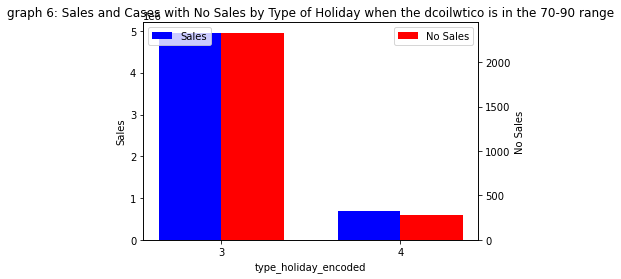

In [27]:
#עושה רושם שכאשר אין מכירות, אז ישנו חג, לכן נרצה לראות בגרף את הקשר בין סוג החג למכירות
#גרף 6

# Group the data by type_holiday and calculate the total sales for each type
sales_by_type_holiday = df_merge_dcoilwtico.groupby('type_holiday_encoded')['sales'].sum()

# Get all unique type_holidays
all_type_holidays = df_merge_dcoilwtico['type_holiday_encoded'].unique()

# Create a list to store the sales values for all type_holidays
sales_values = []

# Create a list to store the number of cases with no sales for all type_holidays
no_sales_count = []

# Iterate over all unique type_holidays
for type_holiday in all_type_holidays:
    # If the type_holiday has a sales value, append it to the sales_values list
    if type_holiday in sales_by_type_holiday.index:
        sales_values.append(sales_by_type_holiday[type_holiday])
    # If the type_holiday has no sales value, append 0 to sales_values
    else:
        sales_values.append(0)

    # Count the number of cases with no sales for each type_holiday
    no_sales_count.append(len(df_merge_dcoilwtico[(df_merge_dcoilwtico['type_holiday_encoded'] == type_holiday) & (df_merge_dcoilwtico['sales'] == 0)]))

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
r1 = np.arange(len(all_type_holidays))
r2 = [x + bar_width for x in r1]

# Create the figure and axes
fig, ax1 = plt.subplots()

# Create the first y-axis for sales
ax1.bar(r1, sales_values, width=bar_width, label='Sales', color='blue')
ax1.set_xlabel('type_holiday_encoded')
ax1.set_ylabel('Sales')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Create a second y-axis for no sales
ax2 = ax1.twinx()
ax2.bar(r2, no_sales_count, width=bar_width, label='No Sales', color='red')
ax2.set_ylabel('No Sales')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Customize the x-axis ticks and labels
plt.xticks([r + bar_width / 2 for r in range(len(all_type_holidays))], all_type_holidays)

# Add a title
plt.title('graph 6: Sales and Cases with No Sales by Type of Holiday when the dcoilwtico is in the 70-90 range')

# Display the bar graph
plt.show()




In [28]:
# מגרף 5 ניתן לראות שהאזורים הריקים שראינו שללא מכירות כלל בטווח 70-90 במחיר נפט יומי בעיקר כאשר ישנו חג מסוג הולידי(3) או שהחג הועבר (4)

In [29]:
#מאחר ולנתונים יש מבנה של סדרת זמן, נרצה לתת חשיבות גם לתכונת התאריך, ועל כן נבצע המרה של עמודת התאריכים בדאטה שכרגע בפורמט אובייקט לפורמט תאריך(דאטה-טיים),שיאפשר לנו לתפעל ולנתח את התאריכים בקלות באמצעות פונקציות דאטה-טיים של פנדה    

df_merge['date'] = pd.to_datetime(df_merge['date'])
df_merge['year'] = df_merge['date'].dt.year
df_merge['month'] = df_merge['date'].dt.month
df_merge['week'] = df_merge['date'].dt.isocalendar().week
df_merge['day_of_week'] = df_merge['date'].dt.day_name()
display(df_merge)

,id,date,store_nbr,family,sales,onpromotion,type_holiday,locale,locale_name,description,...,locale_name_encoded,description_encoded,transferred_encoded,city_encoded,state_encoded,type_store_encoded,year,month,week,day_of_week
73062,73062,2013-02-11,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Carnaval,...,4,11,0,18,12,3,2013,2,7,Monday
73063,73063,2013-02-11,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Carnaval,...,4,11,0,18,12,3,2013,2,7,Monday
73064,73064,2013-02-11,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Carnaval,...,4,11,0,18,12,3,2013,2,7,Monday
73065,73065,2013-02-11,1,BEVERAGES,172.000,0,Holiday,National,Ecuador,Carnaval,...,4,11,0,18,12,3,2013,2,7,Monday
73066,73066,2013-02-11,1,BOOKS,0.000,0,Holiday,National,Ecuador,Carnaval,...,4,11,0,18,12,3,2013,2,7,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,...,19,26,0,18,12,1,2017,8,33,Tuesday
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,...,19,26,0,18,12,1,2017,8,33,Tuesday
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,...,19,26,0,18,12,1,2017,8,33,Tuesday
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,...,19,26,0,18,12,1,2017,8,33,Tuesday


In [30]:
# Encode 'day_of_week' property
df_merge['day_of_week_encoded'] = le.fit_transform(df_merge['day_of_week']) # Encode 'type_store' property

# Print the encoded values and their corresponding original values
print(df_merge[['day_of_week', 'day_of_week_encoded']].drop_duplicates())


       day_of_week  day_of_week_encoded
73062       Monday                    1
74844      Tuesday                    3
179982      Friday                    0
213840   Wednesday                    4
372438    Thursday                    2


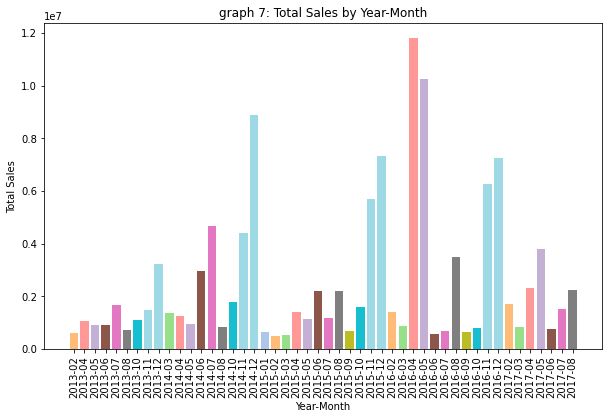

In [31]:
#גרף 7
# Group the data by year and month and calculate the total sales for each combination
sales_by_year_month = df_merge.groupby(['year', 'month'])['sales'].sum()

# Reset the index to convert the grouped data into a DataFrame
sales_by_year_month = sales_by_year_month.reset_index()

# Create a color map for each month
num_months = len(sales_by_year_month['month'].unique())
colors = plt.cm.get_cmap('tab20', num_months)

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create the bar graph
plt.bar(range(len(sales_by_year_month)), sales_by_year_month['sales'], color=colors(sales_by_year_month['month']))

# Customize the x-axis labels
labels = [f"{year}-{month:02d}" for year, month in zip(sales_by_year_month['year'], sales_by_year_month['month'])]
plt.xticks(range(len(sales_by_year_month)), labels, rotation='vertical')

# Add labels and title
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.title('graph 7: Total Sales by Year-Month')

# Display the bar graph
plt.show()


In [32]:
#ניתן לראות שיש עלייה במכירות לקראת סוף השנה, וכן שבאפריל ומאי 2016 היה את הכי הרבה מכירות
#נבדוק האם לקידום מכירות ישנה השפעה על המכירות לאורך זמן, לשם כך ניצור את אותו הגרף רק במקום מכירות נשים את המשתנה של קידום מכירות

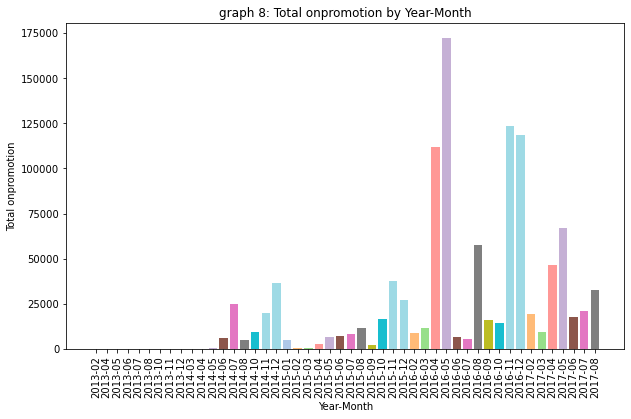

In [33]:
#גרף 8
# Group the data by year and month and calculate the total sales for each combination
sales_by_year_month = df_merge.groupby(['year', 'month'])['onpromotion'].sum()

# Reset the index to convert the grouped data into a DataFrame
sales_by_year_month = sales_by_year_month.reset_index()

# Create a color map for each month
num_months = len(sales_by_year_month['month'].unique())
colors = plt.cm.get_cmap('tab20', num_months)

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create the bar graph
plt.bar(range(len(sales_by_year_month)), sales_by_year_month['onpromotion'], color=colors(sales_by_year_month['month']))

# Customize the x-axis labels
labels = [f"{year}-{month:02d}" for year, month in zip(sales_by_year_month['year'], sales_by_year_month['month'])]
plt.xticks(range(len(sales_by_year_month)), labels, rotation='vertical')

# Add labels and title
plt.xlabel('Year-Month')
plt.ylabel('Total onpromotion')
plt.title('graph 8: Total onpromotion by Year-Month')

# Display the bar graph
plt.show()


In [34]:
#ניתן לראות כי קידום המכירות החל במאי 2014, ומאז המכירות בסוף השנה עלו יותר. דבר נוסף ראינו בגרף 6 שבאפריל 2016 היו הכי הרבה מכירות, ואז בגרף 7 רואים שבמאי 2016 היה הקידום מכירות הגבוהה ביותר.  

In [35]:
#גודל המקדם מייצג את עוצמת הקשר בין תכונת הקלט למשתנה הפלט. מקדם גדול יותר פירושו שלשינוי של יחידה אחת בתכונת הקלט יש השפעה גדולה יותר על משתנה הפלט
#מקדם חיובי אומר שככל שתכונת הקלט גדלה, גם משתנה הפלט גדל. מקדם שלילי אומר שככל שתכונת הקלט גדלה, משתנה הפלט פוחת


Statistical analysis:

In [36]:
#Pearson coefficient correlation test

cor_sales_onpromotion= df_merge['sales'].corr(df_merge['onpromotion'], method='pearson') # Compute the Pearson correlation coefficient
print(f"Pearson correlation coefficient sales vs onpromotion : {cor_sales_onpromotion}") # Print the correlation coefficient

cor_sales_transactions= df_merge['sales'].corr(df_merge['transactions'], method='pearson')
print(f"Pearson correlation coefficient sales vs transactions: {cor_sales_transactions}")

cor_sales_type_holiday_encoded= df_merge['sales'].corr(df_merge['type_holiday_encoded'], method='pearson')
print(f"Pearson correlation coefficient sales vs type_holiday_encoded : {cor_sales_type_holiday_encoded}")

cor_sales_locale_encoded= df_merge['sales'].corr(df_merge['locale_encoded'], method='pearson')
print(f"Pearson correlation coefficient sales vs locale_encoded : {cor_sales_locale_encoded}")

cor_sales_description_encoded= df_merge['sales'].corr(df_merge['description_encoded'], method='pearson')
print(f"Pearson correlation coefficient sales vs description_encoded : {cor_sales_description_encoded}")


cor_sales_cluster= df_merge['sales'].corr(df_merge['cluster'], method='pearson')
print(f"Pearson correlation coefficient sales vs cluster: {cor_sales_cluster}")

cor_sales_city_encodeds= df_merge['sales'].corr(df_merge['city_encoded'], method='pearson')
print(f"Pearson correlation coefficient sales vs city_encoded: {cor_sales_city_encodeds}")

cor_sales_state_encoded= df_merge['sales'].corr(df_merge['state_encoded'], method='pearson')
print(f"Pearson correlation coefficient sales vs state_encoded : {cor_sales_state_encoded}")


Pearson correlation coefficient sales vs onpromotion : 0.4088980520423472
Pearson correlation coefficient sales vs transactions: 0.2012114231533182
Pearson correlation coefficient sales vs type_holiday_encoded : -0.037587800515137756
Pearson correlation coefficient sales vs locale_encoded : 0.01829181781391624
Pearson correlation coefficient sales vs description_encoded : 0.02432701810791186
Pearson correlation coefficient sales vs cluster: 0.03349138065762824
Pearson correlation coefficient sales vs city_encoded: 0.05086536484957777
Pearson correlation coefficient sales vs state_encoded : 0.06831404360383284


In [37]:
#יצא מקדם מתאם פרסון נמוך לסוג אשכול, עיר ומדינה

In [54]:
df_merge_RNN = df_merge[["date", "year", "month", "week", "day_of_week_encoded", "sales", "type_store_encoded", "store_nbr",
                 "family_encoded", "onpromotion", "transactions", "type_holiday_encoded", 
                     "description_encoded", "transferred_encoded"]]
                   
# "locale_encoded", "locale_name_encoded",

# RNN model:

In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into features (X) and target (y)
X = df_merge_RNN.drop(['sales', 'date'], axis=1)
y = df_merge_RNN['sales']

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the features to match the input shape of the RNN model
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


Epoch 1/10
7501/7501 [==============================] - 59s 8ms/step - loss: 1642886.6250
Epoch 2/10
7501/7501 [==============================] - 58s 8ms/step - loss: 1571838.0000
Epoch 3/10
7501/7501 [==============================] - 58s 8ms/step - loss: 1554586.3750
Epoch 4/10
7501/7501 [==============================] - 52s 7ms/step - loss: 1552053.2500
Epoch 5/10
7501/7501 [==============================] - 53s 7ms/step - loss: 1551763.7500
Epoch 6/10
7501/7501 [==============================] - 54s 7ms/step - loss: 1551730.8750
Epoch 7/10
6138/7501 [=======================>......] - ETA: 10s - loss: 1536360.6250

KeyboardInterrupt: 

In [73]:
#יצא ממדי העכה גבוהים, לכן ננסה להוסיף קצב למידה. נתחיל עם 0.01

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into features (X) and target (y)
X = df_merge_RNN.drop(['sales', 'date'], axis=1)
y = df_merge_RNN['sales']

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the features to match the input shape of the RNN model
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1)
])


# Compile the model with a specific learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse')


# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


Epoch 1/10
6003/7501 [=======================>......] - ETA: 11s - loss: 1599000.6250

KeyboardInterrupt: 

In [74]:
# עדיין ערכים של ממדי הערכה גבוהים, לכן ננסה להעלות את מספר התקופות ל30, וקצב למידה 0.2
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into features (X) and target (y)
X = df_merge_RNN.drop(['sales', 'date'], axis=1)
y = df_merge_RNN['sales']

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the features to match the input shape of the RNN model
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1)
])


# Compile the model with a specific learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.2)
model.compile(optimizer=optimizer, loss='mse')


# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


Epoch 1/30
2461/7501 [========>.....................] - ETA: 35s - loss: 1592888.8750

KeyboardInterrupt: 

In [75]:
#  הורדנו את קצב הלמידה ל0.01, ושינינו את קנה המידה של משתנה היעד מכירות

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into features (X) and target (y)
X = df_merge_RNN.drop(['sales', 'date'], axis=1)
y = df_merge_RNN['sales']

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the features to match the input shape of the RNN model
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Scale the target variable
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1))


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1)
])


# Compile the model with a specific learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse')


# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


Epoch 1/30
7501/7501 [==============================] - 54s 7ms/step - loss: 2.8927e-04
Epoch 2/30
7501/7501 [==============================] - 47s 6ms/step - loss: 1.0354e-04
Epoch 3/30
7501/7501 [==============================] - 46s 6ms/step - loss: 4.7187e-04
Epoch 4/30
7501/7501 [==============================] - 46s 6ms/step - loss: 2.1682e-04
Epoch 5/30
7501/7501 [==============================] - 48s 6ms/step - loss: 8.1610e-04
Epoch 6/30
4112/7501 [===============>..............] - ETA: 21s - loss: 1.9083e-04

KeyboardInterrupt: 

In [76]:
#  loss= mae

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into features (X) and target (y)
X = df_merge_RNN.drop(['sales', 'date'], axis=1)
y = df_merge_RNN['sales']

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the features to match the input shape of the RNN model
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Scale the target variable
scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1))


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1)
])


# Compile the model with a specific learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mae')


# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


Epoch 1/30
7501/7501 [==============================] - 48s 6ms/step - loss: 0.0050
Epoch 2/30
7501/7501 [==============================] - 48s 6ms/step - loss: 0.0209
Epoch 3/30
7501/7501 [==============================] - 46s 6ms/step - loss: 0.0349
Epoch 4/30
7501/7501 [==============================] - 44s 6ms/step - loss: 0.0361
Epoch 5/30
7501/7501 [==============================] - 45s 6ms/step - loss: 0.0308
Epoch 6/30
7501/7501 [==============================] - 49s 6ms/step - loss: 0.0335
Epoch 7/30
7501/7501 [==============================] - 49s 6ms/step - loss: 0.0328
Epoch 8/30
7501/7501 [==============================] - 46s 6ms/step - loss: 0.0357
Epoch 9/30
7501/7501 [==============================] - 48s 6ms/step - loss: 0.0350
Epoch 10/30
7501/7501 [==============================] - 45s 6ms/step - loss: 0.0359
Epoch 11/30
7501/7501 [==============================] - 49s 7ms/step - loss: 0.0348
Epoch 12/30
7501/7501 [==============================] - 44s 6ms/step - lo

In [ ]:
------------------------------------------------------------------------------------------------

In [ ]:
# Group the data by year and month and calculate the total sales for each combination
sales_by_year_month = df_merge.groupby(['year', 'month'], as_index=False)['sales'].sum()

# Pivot the data to create a matrix of sales values with years as rows and months as columns
sales_pivot = sales_by_year_month.pivot('year', 'month', 'sales')

# Create a heatmap using seaborn to visualize the sales values
plt.figure(figsize=(11, 10))
sns.heatmap(sales_pivot, cmap='YlGnBu', annot=True, fmt='.0f', cbar=True)
plt.xlabel('month')
plt.ylabel('year')
plt.title('Sales by Year and Month')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjusts the spacing between subplots for better visibility
plt.show()

In [ ]:
#epochs- כמה פעמים עבר על כל הדאטה
#batch- מס' החלקים אליו האימון מחולק(כך שכל בטצ' בודד זה חלק). כאשר כל מספר הבטצ'ים עברו , ז''א שאיפוק אחד הסתיים.